In [152]:
# Import Package yang dibutuhkan
import numpy as np 
import pandas as pd 
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold 
# import accuracy score
from sklearn.metrics import accuracy_score
# import logistic regression
from sklearn.linear_model import LogisticRegression
# import r2 score
from sklearn.metrics import r2_score, f1_score
# import xgb classifier
from xgboost import XGBClassifier
# import classification report
from sklearn.metrics import classification_report
# import confusion matrix
from sklearn.metrics import confusion_matrix
# import gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


In [153]:
df = pd.read_csv('data.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [154]:
df.shape

(918, 12)

In [155]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [156]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [157]:
df['Sex'] = df['Sex'].replace({'M':1, 'F':2})

In [158]:
df['ChestPainType'] = df['ChestPainType'].replace({'ASY':1, 'NAP':2, 'ATA':3, 'TA':4})

In [159]:
df['RestingECG'] = df['RestingECG'].replace({'Normal':1, 'LVH':2, 'ST':3})

In [160]:
df['ExerciseAngina'] = df['ExerciseAngina'].replace({'N':0, 'Y':1})

In [161]:
df['ST_Slope'] = df['ST_Slope'].replace({'Up':1, 'Flat':2, 'Down':3})

In [177]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,3,140,289,0,1,172,0,0.0,1,0
1,49,2,2,160,180,0,1,156,0,1.0,2,1
2,37,1,3,130,283,0,3,98,0,0.0,1,0
3,48,2,1,138,214,0,1,108,1,1.5,2,1
4,54,1,2,150,195,0,1,122,0,0.0,1,0


In [162]:
X = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=92)

In [164]:
scoreTrainArr = []
scoreTestArr = []

# Fungsi untuk melakukan prediksi dan evaluasi hasil
def pred_model(model):
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Training and Testing Score
    scoreTrain = model.score(X_train, y_train)
    scoreTest = model.score(X_test, y_test)
    
    scoreTrainArr.append(scoreTrain)
    scoreTestArr.append(scoreTest)
    
    print("=====================================================")
    print("Evaluasi Akurasi Model:")
    print("Training Accuracy :", scoreTrain)
    print("Testing Accuracy :", scoreTest)
    
    print("=====================================================")
    
    print("\nClassification report untuk data test:")
    cr = classification_report(y_test, y_pred_test)
    print(cr)
    
    print("=====================================================")
    
    # Accuracy Score and F1 Score
    # print('Accuracy Score: ', accuracy_score(y_test,y_pred_test))
    print('F1 Score: ', f1_score(y_test,y_pred_test))
    print("=====================================================")
    
    # Confussion Matrix
    confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_pred_test)), ('Normal', 'Hearth Disease'), ('Normal', 'Heart Disease'))

    # Plot confusion matrix
    plt.figure()
    heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0,  fontsize=14)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0,  fontsize=14)

    plt.title('Confusion Matrix untuk Data Test', fontsize=18, color='darkblue')
    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)
    plt.show()
    
    

In [165]:
import warnings
warnings.filterwarnings('ignore')

Evaluasi Akurasi Model:
Training Accuracy : 0.8542234332425068
Testing Accuracy : 0.8913043478260869

Classification report untuk data test:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        84
           1       0.90      0.90      0.90       100

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184

F1 Score:  0.9


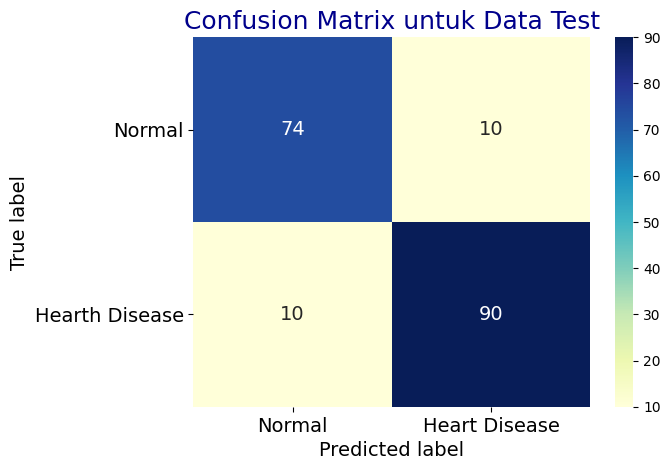

In [166]:
logreg = LogisticRegression()
pred_model(logreg)

In [167]:
model = GradientBoostingClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],  
    'learning_rate': [0.1, 0.01, 0.001],  
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Gradient Boosting Best Parameters:", best_params)

Gradient Boosting Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}


Evaluasi Akurasi Model:
Training Accuracy : 0.9019073569482289
Testing Accuracy : 0.8913043478260869

Classification report untuk data test:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        84
           1       0.88      0.92      0.90       100

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184

F1 Score:  0.9019607843137256


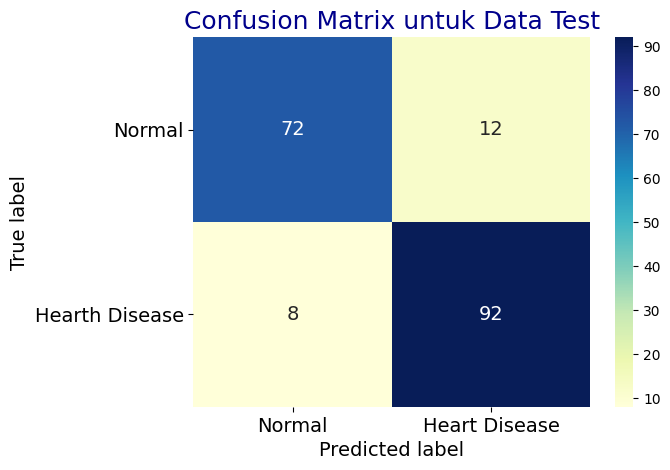

In [168]:
gb = GradientBoostingClassifier(**best_params)
pred_model(gb)

In [169]:
model = CatBoostClassifier()

param_grid = {
    'iterations': [100, 200, 300],  
    'learning_rate': [0.1, 0.01, 0.001], 
    'depth': [4, 6, 8]  
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("CatBoost Best Parameters:", best_params)

0:	learn: 0.6483872	total: 685us	remaining: 67.8ms
1:	learn: 0.6114240	total: 1.19ms	remaining: 58.4ms
2:	learn: 0.5855911	total: 1.56ms	remaining: 50.4ms
3:	learn: 0.5599423	total: 1.88ms	remaining: 45.2ms
4:	learn: 0.5358805	total: 2.25ms	remaining: 42.8ms
5:	learn: 0.5172919	total: 2.61ms	remaining: 40.9ms
6:	learn: 0.5009161	total: 3ms	remaining: 39.9ms
7:	learn: 0.4829069	total: 3.42ms	remaining: 39.3ms
8:	learn: 0.4678231	total: 3.78ms	remaining: 38.2ms
9:	learn: 0.4543410	total: 4.12ms	remaining: 37.1ms
10:	learn: 0.4422458	total: 4.42ms	remaining: 35.8ms
11:	learn: 0.4335910	total: 4.79ms	remaining: 35.1ms
12:	learn: 0.4240631	total: 5.11ms	remaining: 34.2ms
13:	learn: 0.4172182	total: 5.55ms	remaining: 34.1ms
14:	learn: 0.4095019	total: 5.99ms	remaining: 33.9ms
15:	learn: 0.4018496	total: 6.34ms	remaining: 33.3ms
16:	learn: 0.3939014	total: 6.75ms	remaining: 33ms
17:	learn: 0.3878127	total: 7.11ms	remaining: 32.4ms
18:	learn: 0.3827589	total: 7.45ms	remaining: 31.8ms
19:	learn

0:	learn: 0.6850568	total: 1.55ms	remaining: 462ms
1:	learn: 0.6763658	total: 2.49ms	remaining: 371ms
2:	learn: 0.6685113	total: 3.62ms	remaining: 359ms
3:	learn: 0.6620136	total: 4.55ms	remaining: 337ms
4:	learn: 0.6554649	total: 5.52ms	remaining: 326ms
5:	learn: 0.6495819	total: 6.58ms	remaining: 323ms
6:	learn: 0.6420032	total: 7.57ms	remaining: 317ms
7:	learn: 0.6365974	total: 8.75ms	remaining: 319ms
8:	learn: 0.6298649	total: 9.77ms	remaining: 316ms
9:	learn: 0.6237703	total: 10.6ms	remaining: 307ms
10:	learn: 0.6173501	total: 11.5ms	remaining: 303ms
11:	learn: 0.6102434	total: 12.5ms	remaining: 300ms
12:	learn: 0.6037734	total: 13.4ms	remaining: 295ms
13:	learn: 0.5979472	total: 14.2ms	remaining: 291ms
14:	learn: 0.5922706	total: 15.2ms	remaining: 289ms
15:	learn: 0.5867811	total: 16.1ms	remaining: 286ms
16:	learn: 0.5816693	total: 17ms	remaining: 283ms
17:	learn: 0.5770689	total: 17.9ms	remaining: 280ms
18:	learn: 0.5722916	total: 18.7ms	remaining: 276ms
19:	learn: 0.5669738	tot

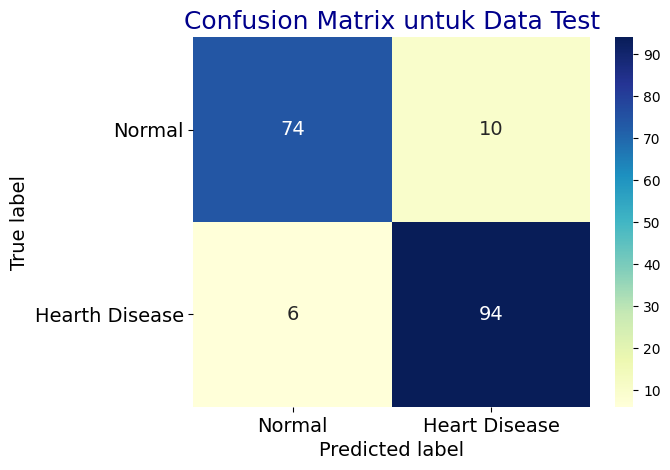

In [170]:
catboostmodel = CatBoostClassifier(**best_params)
pred_model(catboostmodel)

Evaluasi Akurasi Model:
Training Accuracy : 0.8365122615803815
Testing Accuracy : 0.8858695652173914

Classification report untuk data test:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88        84
           1       0.90      0.89      0.89       100

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184

F1 Score:  0.8944723618090452


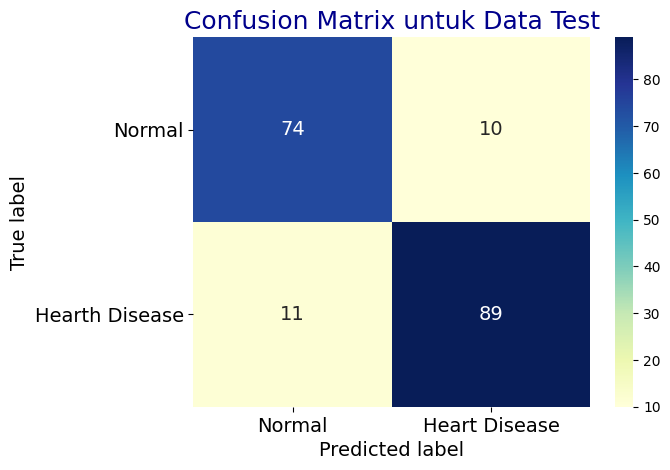

In [171]:
# import naive bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
pred_model(nb)

In [172]:
model = XGBClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],  
    'learning_rate': [0.1, 0.01, 0.001], 
    'max_depth': [3, 5, 7] 
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("XGB Best Parameters:", best_params)

XGB Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300}


Evaluasi Akurasi Model:
Training Accuracy : 0.9373297002724795
Testing Accuracy : 0.8804347826086957

Classification report untuk data test:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        84
           1       0.88      0.90      0.89       100

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184

F1 Score:  0.8910891089108911


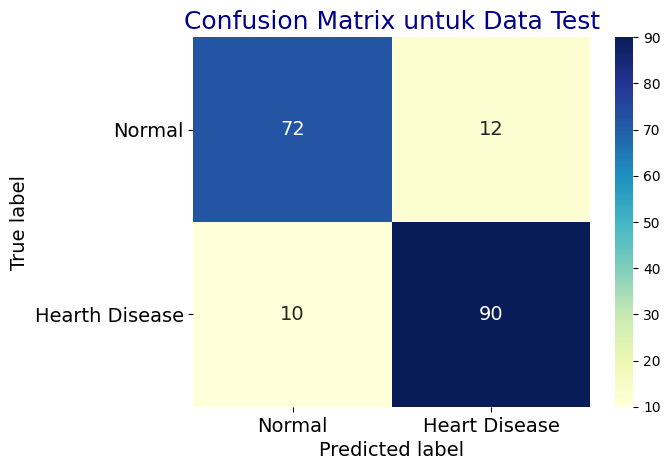

In [173]:
xgb = XGBClassifier(**best_params)
pred_model(xgb)

In [174]:
nama_model = ['Logistic Regression', 'Gradient Boosting', 'CatBoost', 'Naive Bayes', 'XGBoost']

In [175]:
print(scoreTrainArr)
print(scoreTestArr)

[0.8542234332425068, 0.9019073569482289, 0.8896457765667575, 0.8365122615803815, 0.9373297002724795]
[0.8913043478260869, 0.8913043478260869, 0.9130434782608695, 0.8858695652173914, 0.8804347826086957]


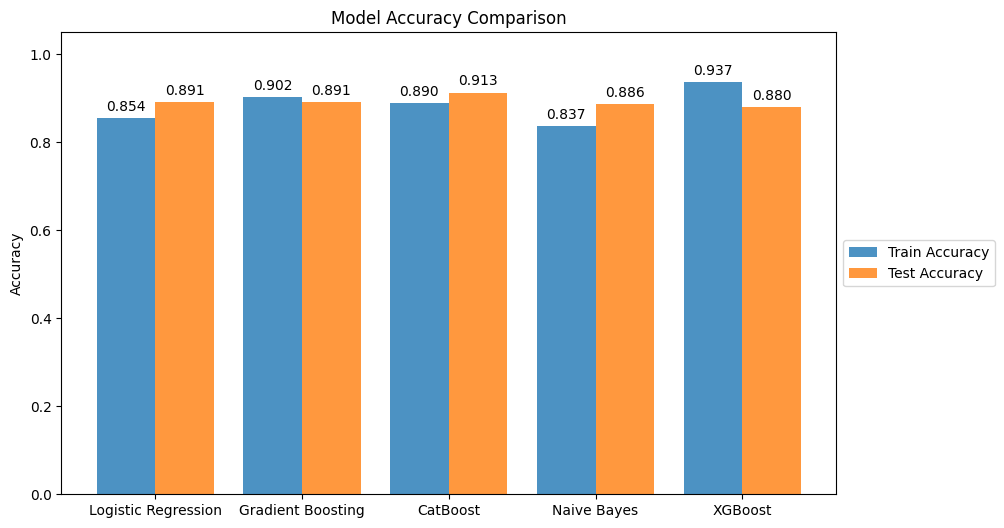

In [176]:
fig, ax = plt.subplots(figsize=(10, 6))

# Lebar setiap bar
bar_width = 0.4

# Array untuk sumbu x
x_pos = np.arange(len(nama_model))

# Plot untuk akurasi train
train_bars = ax.bar(x_pos, scoreTrainArr, width=bar_width, align='center', alpha=0.8, label='Train Accuracy')

# Plot untuk akurasi test
test_bars = ax.bar(x_pos + bar_width, scoreTestArr, width=bar_width, align='center', alpha=0.8, label='Test Accuracy')

ax.set_xticks(x_pos + bar_width / 2)
ax.set_xticklabels(nama_model)

ax.set_ylabel('Accuracy')

ax.set_title('Model Accuracy Comparison')

# Untuk memberikan annotation di setiap puncak bar
for bar1, bar2 in zip(train_bars, test_bars):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    ax.annotate(f'{height1:.3f}', xy=(bar1.get_x() + bar1.get_width() / 2, height1),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')
    ax.annotate(f'{height2:.3f}', xy=(bar2.get_x() + bar2.get_width() / 2, height2),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

ax.set_ylim(0, 1.05)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [221]:
# inputan = np.array([[17, 2, 2, 130, 140, 0, 1, 110, 0, 1, 2]])
inputan = np.array([[65, 1, 3, 170, 240, 1, 1, 150, 1, 1, 2]])
y_pred_inputan = catboostmodel.predict(inputan)

In [222]:
y_pred_inputan

array([1], dtype=int64)

In [181]:
import pickle
with open('heart_disease_model.pickle', 'wb') as f:
    pickle.dump(catboostmodel, f)

In [182]:
with open('heart_disease_model.pickle', 'rb') as f:
    model = pickle.load(f)

In [223]:
y_pred_inputan = model.predict(inputan)
y_pred_inputan

array([1], dtype=int64)